In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [18]:
df = pd.read_csv("./results/runtimes_random_trees_1000-10000.csv",names=['type','num_otus','id','our_time','ete_time'])

In [19]:
df

,type,num_otus,id,our_time,ete_time
0,random,1000,0,0.008013,0.313596
1,random,1000,1,0.006981,0.176231
2,random,1000,2,0.006981,0.111701
3,random,1000,3,0.006982,0.441732
4,random,1000,4,0.042718,0.143379
...,...,...,...,...,...
9995,random,10000,995,0.175563,4.777769
9996,random,10000,996,0.134598,43.473236
9997,random,10000,997,0.140626,32.822115
9998,random,10000,998,0.162533,2.220096


In [20]:
# Reshape the DataFrame
df_melted = pd.melt(df, id_vars=['num_otus'], value_vars=['our_time', 'ete_time'], 
                    var_name='Algorithm', value_name='Runtime')

df_melted['Algorithm'] = df_melted['Algorithm'].replace({'our_time': 'OrthoParaLabel', 'ete_time': 'ETE'})

df_melted

,num_otus,Algorithm,Runtime
0,1000,OrthoParaLabel,0.008013
1,1000,OrthoParaLabel,0.006981
2,1000,OrthoParaLabel,0.006981
3,1000,OrthoParaLabel,0.006982
4,1000,OrthoParaLabel,0.042718
...,...,...,...
19995,10000,ETE,4.777769
19996,10000,ETE,43.473236
19997,10000,ETE,32.822115
19998,10000,ETE,2.220096


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\localmgr\AppData\Local\Temp\ipykernel_31472\3502256919.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


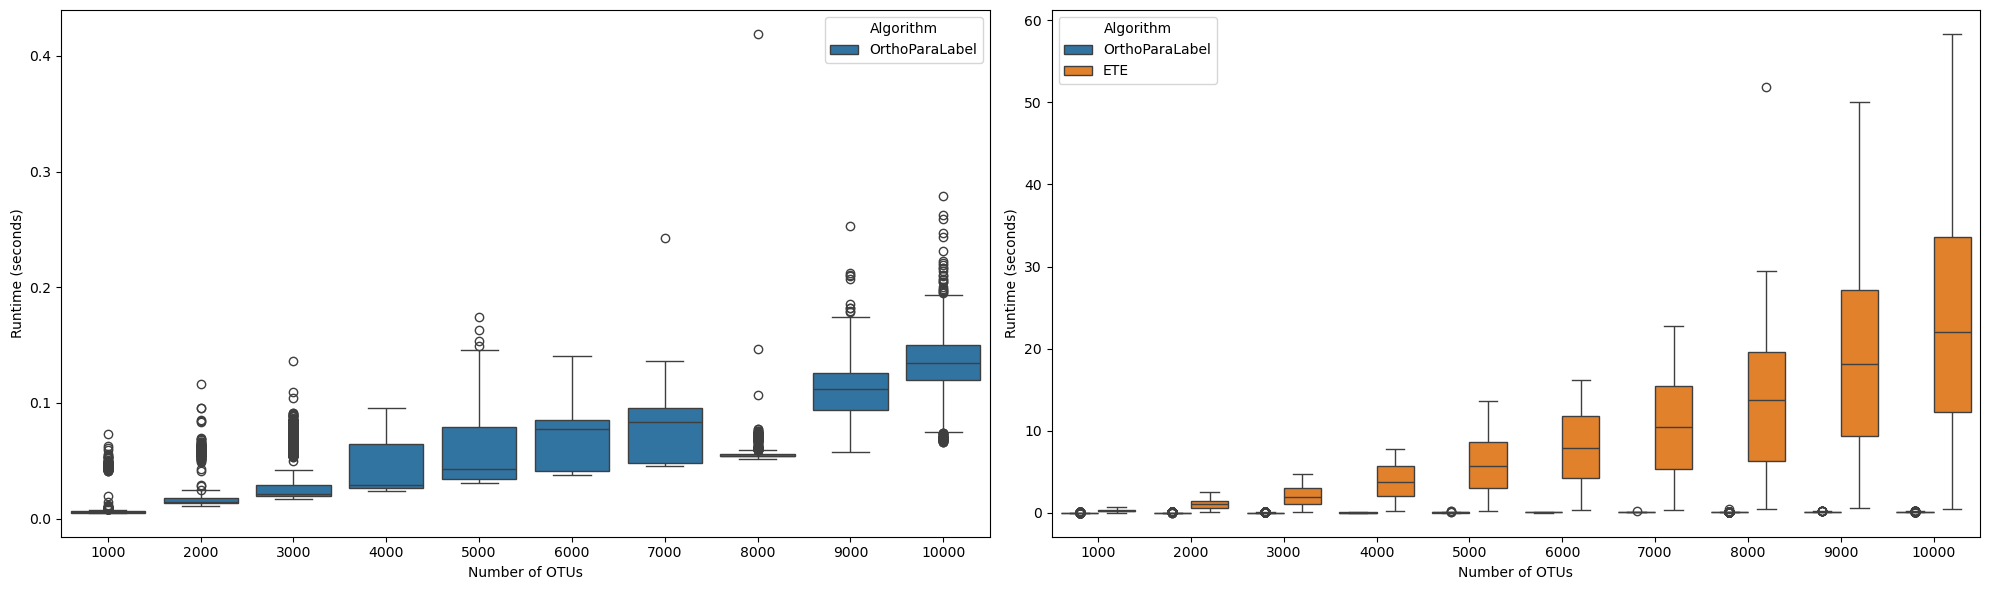

In [21]:
# Define the order of sizes
sizes = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=False)

# plt.rcParams.update({'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 14})

# Plot 1 - The runtime of our algorithm - to show approximately linear increase in time in terms of OTU number
df_our_time = df_melted[df_melted['Algorithm']=='OrthoParaLabel']
sns.boxplot(data=df_our_time, x='num_otus', y='Runtime', hue='Algorithm', order=sizes, ax=axes[0])
axes[0].set_xlabel('Number of OTUs')
axes[0].set_ylabel('Runtime (seconds)')
axes[0].set_title('')
axes[0].legend(title='Algorithm')


# Plot 2 - The runtime of both algorithms - to compare performance
axes[1] = sns.boxplot(data=df_melted, x='num_otus', y='Runtime', hue='Algorithm', order=sizes, ax=axes[1])
axes[1].set_xlabel('Number of OTUs')
axes[1].set_ylabel('Runtime (seconds)')
axes[1].set_title('')
axes[1].legend(title='Algorithm')

fig.tight_layout()
fig.savefig('./figures/runtime_comparison.eps', format='eps', dpi=500)
fig.show()

AttributeError: 'Axes' object has no attribute 'set_color'

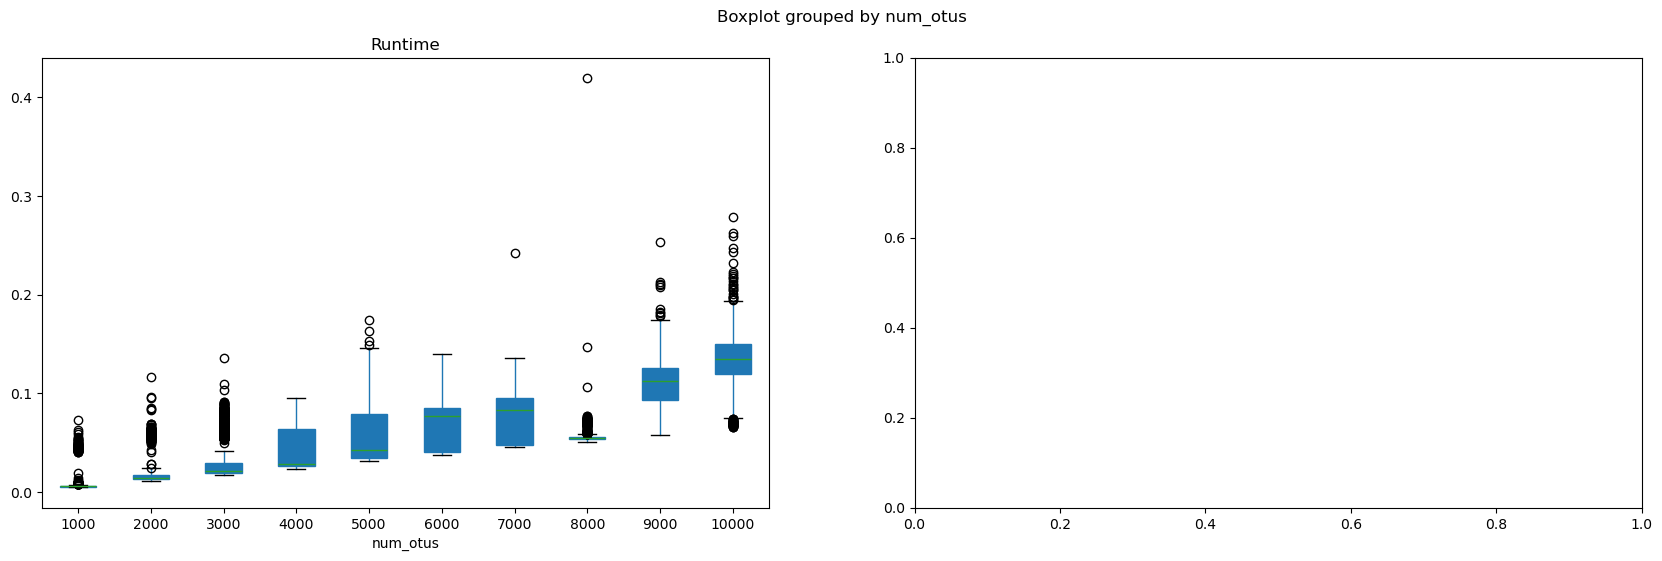

In [22]:
# Reshape the DataFrame
df_melted = pd.melt(df, id_vars=['num_otus'], value_vars=['our_time', 'ete_time'], 
                    var_name='Algorithm', value_name='Runtime')

our_time_data = df_melted[df_melted['Algorithm'] == 'our_time']

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=False)

# Plot the boxplot for our algorithm's time
bp_ourtime = our_time_data.boxplot(column='Runtime', by='num_otus', ax=axes[0], grid=False, patch_artist=True).set_color('red')

axes[0].set_title('')
axes[0].set_xlabel('Number of OTUs')
axes[0].set_ylabel('Runtime (seconds)')
axes[0].set_xticklabels([str(i) for i in sorted(df['num_otus'].unique())])
axes[0].set_xticks(range(1, len(df['num_otus'].unique()) + 1))

df_melted.boxplot(column='Runtime', by=['num_otus', 'Algorithm'], ax=axes[1], grid=False, patch_artist=True)
axes[1].set_title('')
axes[1].set_xlabel('Number of OTUs')
axes[1].set_ylabel('Runtime (seconds)')
axes[1].set_xticks([1.5, 3.5, 5.5, 7.5, 9.5])
axes[1].set_xticklabels([1000,2000,3000,4000,5000])

# Remove the automatic "Boxplot grouped by" title
plt.suptitle('')

# plt.tight_layout()
plt.show()

In [ ]:
df_mytime = df[['OTUs', 'Our Time']].copy()

# Plot the boxplot for MyTime
plt.figure(figsize=(8, 6))
df_mytime.boxplot(column='Our Time', by='OTUs', grid=False)
plt.xlabel('Number of OTUs')
plt.ylabel('Runtime (seconds)')
plt.title('')

KeyError: "None of [Index(['OTUs', 'Our Time'], dtype='object')] are in the [columns]"

In [ ]:
df_mytime = df[['OTUs', 'ETE Time']].copy()

# Plot the boxplot for MyTime
plt.figure(figsize=(8, 6))
df_mytime.boxplot(column='ETE Time', by='OTUs', grid=False)
plt.xlabel('Number of OTUs')
plt.ylabel('Runtime (seconds)')
plt.title('')

KeyError: "None of [Index(['OTUs', 'ETE Time'], dtype='object')] are in the [columns]"

In [ ]:
df2 = pd.read_pickle("./results_2024/runtimes1000-4000_1.pkl")

FileNotFoundError: [Errno 2] No such file or directory: './results_2024/runtimes1000-4000_1.pkl'

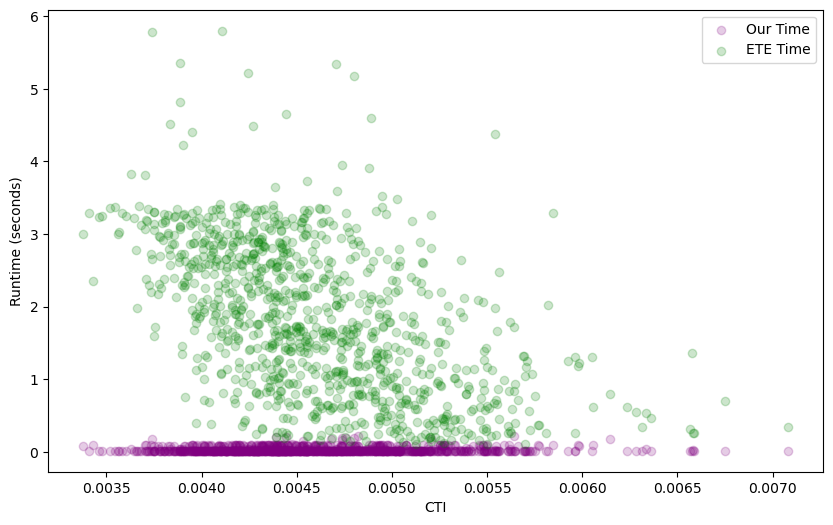

In [ ]:
df_filtered = df2[df2['OTUs'] == 3000]

# Plot scatterplots for both algorithms
plt.figure(figsize=(10, 6))

# Scatterplot for Our Time
plt.scatter(df_filtered['CTI'], df_filtered['Our Time'], color='purple', label='Our Time', marker='o',alpha=0.2)

# Scatterplot for ETE Time
plt.scatter(df_filtered['CTI'], df_filtered['ETE Time'], color='green', label='ETE Time', marker='o',alpha=0.2)

plt.xlabel('CTI')
plt.ylabel('Runtime (seconds)')
plt.title('')
plt.legend()

plt.show()

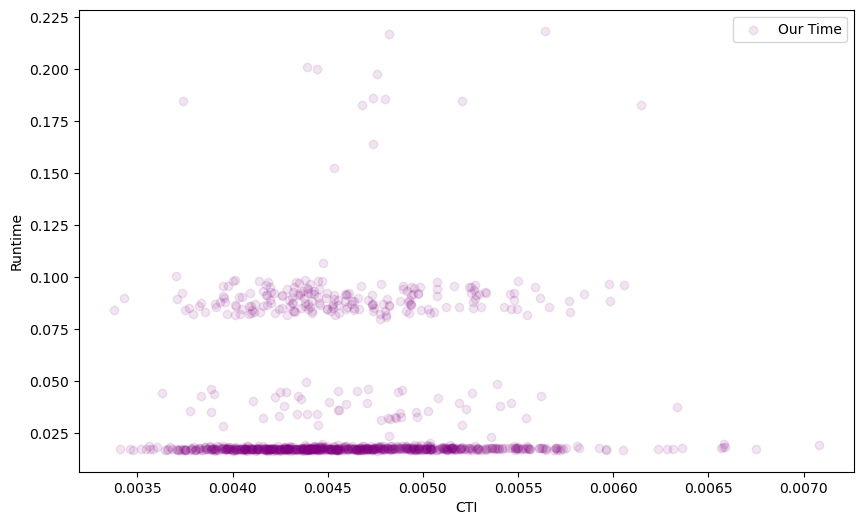

In [ ]:
plt.figure(figsize=(10, 6))

# Scatterplot for Our Time
plt.scatter(df_filtered['CTI'], df_filtered['Our Time'], color='purple', label='Our Time', marker='o',alpha=0.1)

plt.xlabel('CTI')
plt.ylabel('Runtime')
plt.title('')
plt.legend()

plt.show()

In [ ]:
balanced_df = pd.read_csv("./results_2024/balanced_tests_4096_1.csv")
balanced_df.columns = balanced_df.columns.str.strip()

In [ ]:
grouped_df = balanced_df.groupby('type')[['Our Time', 'ETE Time']]

# Create boxplot
plt.figure(figsize=(15, 5))  # Adjust size if necessary
boxplot_axes = grouped_df.boxplot(layout=(1, 3), figsize=(15, 5), patch_artist=True)
plt.suptitle('Runtime Comparison by Tree Type (Both Algorithms)')
plt.xlabel('Tree Type')
boxplot_axes[0].set_ylabel('Runtime (s)')
plt.show()

ValueError: Layout of 1x3 must be larger than required size 4

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
grouped_df = balanced_df.groupby('type')[['Our Time']]

# Create boxplot
plt.figure(figsize=(15, 5))  # Adjust size if necessary
boxplot_axes = grouped_df.boxplot(layout=(1, 3), figsize=(15, 5), patch_artist=True)
plt.suptitle('Runtime Comparison by Tree Type (Our Post-Order Algorithm)')
# plt.suptitle('')  # Remove default title
plt.ylabel('Runtime(s)')
boxplot_axes[0].set_ylabel('Runtime (s)')
plt.show()

ValueError: Layout of 1x3 must be larger than required size 4

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
bal_df = pd.read_csv("./results_2024/balanced_tests_2-2048.csv")
bal_df

,type,size,id,cti,Our Time,ETE Time
0,balanced,4,0,0.000000,0.000016,0.000059
1,pectinate,4,0,1.000000,0.000017,0.000058
2,balanced,4,1,0.000000,0.000016,0.000059
3,pectinate,4,1,1.000000,0.000016,0.000057
4,balanced,4,2,0.000000,0.000016,0.000059
...,...,...,...,...,...,...
29259,random,2048,995,0.006570,0.059668,0.546610
29260,random,2048,996,0.005353,0.059277,1.430273
29261,random,2048,997,0.007187,0.058975,0.639290
29262,random,2048,998,0.007663,0.059638,0.104427


In [ ]:
df_random = bal_df[bal_df["type"]=="random"]
df_pectinate = bal_df[bal_df["type"]=="pectinate"]
df_balanced = bal_df[bal_df["type"]=="balanced"]

df_random.drop(columns=['type'], inplace=True)
df_pectinate.drop(columns=['type'], inplace=True)
df_balanced.drop(columns=['type'], inplace=True)

/tmp/ipykernel_2996164/3005909526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random.drop(columns=['type'], inplace=True)
/tmp/ipykernel_2996164/3005909526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pectinate.drop(columns=['type'], inplace=True)
/tmp/ipykernel_2996164/3005909526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced.drop(columns=['type'], inplace=True)


In [ ]:
df_random

,size,id,cti,Our Time,ETE Time
19264,4,0,1.000000,0.000056,0.000125
19265,4,1,0.000000,0.000030,0.000119
19266,4,2,1.000000,0.000025,0.000103
19267,4,3,1.000000,0.000024,0.000102
19268,4,4,0.000000,0.000024,0.000117
...,...,...,...,...,...
29259,2048,995,0.006570,0.059668,0.546610
29260,2048,996,0.005353,0.059277,1.430273
29261,2048,997,0.007187,0.058975,0.639290
29262,2048,998,0.007663,0.059638,0.104427


In [ ]:
sizes_order = sorted(df_random['size'].unique())
sizes_order.append(2500)
sizes_order

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 2500]

In [ ]:
# Assuming df_random, df_pectinate, and df_balanced are your dataframes

# Create a combined dataframe for random data
df_random_combined = pd.concat([df_random['size'], df_random['Our Time'], df_random['ETE Time']], axis=1)

# Calculate the average runtimes for pectinate and balanced data
pectinate_avg = df_pectinate.groupby('size').mean().reset_index()
balanced_avg = df_balanced.groupby('size').mean().reset_index()

# Plot boxplots for random data
plt.figure(figsize=(10, 6))

# Overlay average runtimes for pectinate and balanced data
plt.subplot(2, 1, 1)
plt.xticks(sizes_order, sizes_order)

for size in sizes_order:
    plt.boxplot(df_random[df_random['size'] == size]['Our Time'], positions=[size], patch_artist=True,widths=100)
plt.title('Random, Balanced, and Pectinate Trees - Our Time')
plt.xlabel('Size')
plt.ylabel('Runtime (seconds)')
# plt.xticks(sizes_order, sizes_order)

plt.plot(pectinate_avg['size'], pectinate_avg['Our Time'], 'rv', label='Pectinate Avg')
plt.plot(balanced_avg['size'], balanced_avg['Our Time'], 'rs', label='Balanced Avg')
plt.boxplot
plt.legend()

plt.subplot(2, 1, 2)

for size in sizes_order:
    plt.boxplot(df_random[df_random['size'] == size]['ETE Time'], positions=[size], patch_artist=True,widths=100)
plt.title('Random, Balanced, and Pectinate Trees - ETE Time')
plt.xlabel('Size')
plt.ylabel('Runtime (seconds)')
# plt.xticks(sizes_order, sizes_order)
plt.plot(pectinate_avg['size'], pectinate_avg['ETE Time'], 'bv', label='Pectinate Avg')
plt.plot(balanced_avg['size'], balanced_avg['ETE Time'], 'bs', label='Balanced Avg')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'df_random' is not defined

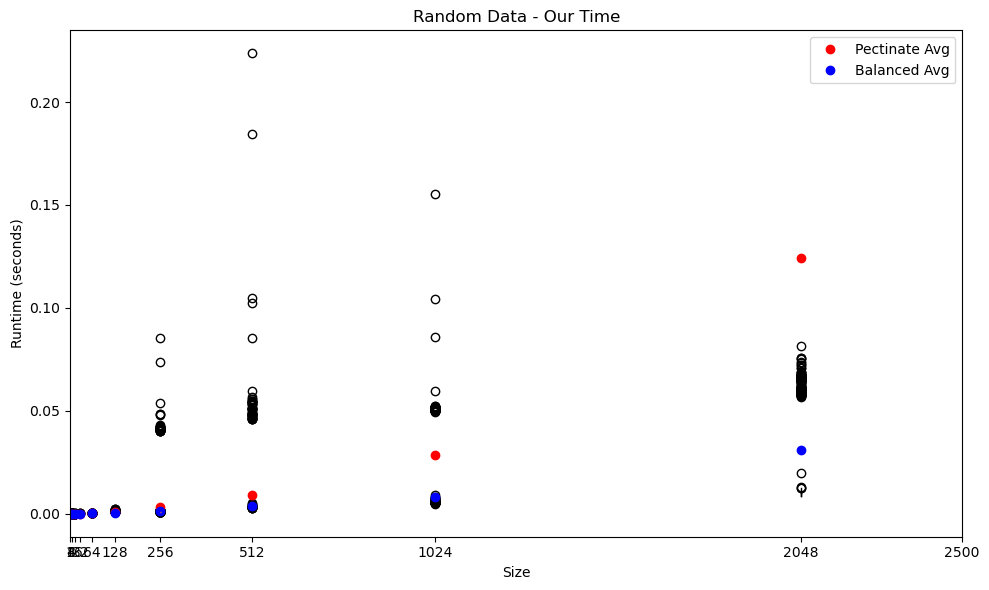

In [ ]:
# Create a single plot
plt.figure(figsize=(10, 6))

# Plot boxplots for random data
for size in sizes_order:
    plt.boxplot(df_random[df_random['size'] == size]['Our Time'], positions=[size])
plt.title('Random Data - Our Time')
plt.xlabel('Size')
plt.ylabel('Runtime (seconds)')
plt.xticks(sizes_order, sizes_order)

# Overlay average runtimes for pectinate and balanced data
plt.plot(pectinate_avg['size'], pectinate_avg['Our Time'], 'ro', label='Pectinate Avg')
plt.plot(balanced_avg['size'], balanced_avg['Our Time'], 'bo', label='Balanced Avg')
plt.legend()

plt.tight_layout()
plt.show()

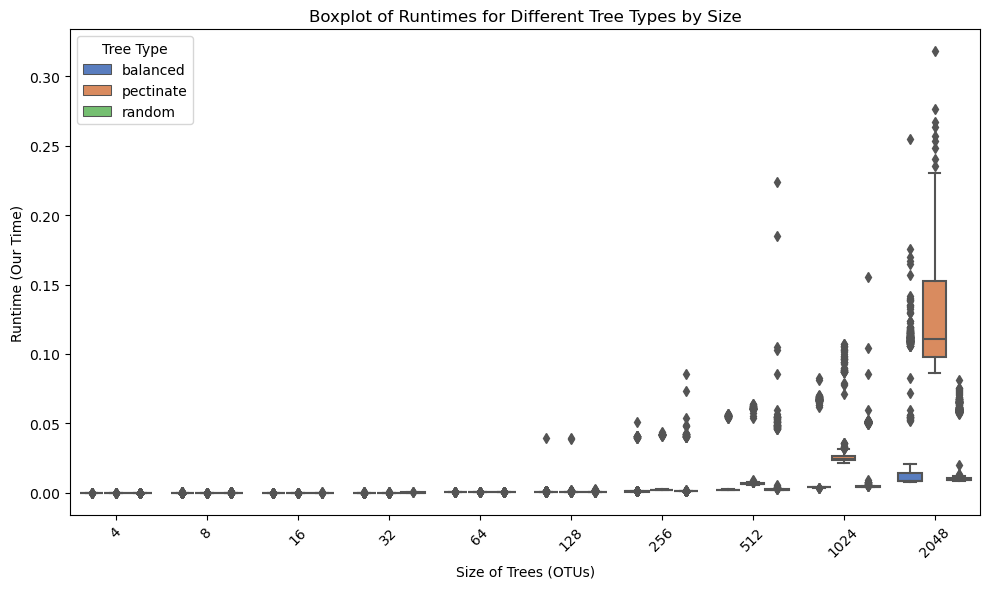

In [ ]:
# Define the order of sizes
sizes = [2**i for i in range(2, 12)]  # Sizes from 4 to 2048

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=bal_df, x='size', y='Our Time', hue='type', order=sizes)
plt.xlabel('Size of Trees (OTUs)')
plt.ylabel('Runtime (Our Time)')
plt.title('Boxplot of Runtimes for Different Tree Types by Size')
plt.xticks(rotation=45)
plt.legend(title='Tree Type')
plt.tight_layout()
plt.show()

In [ ]:
df

,Our Time,ETE Time,CTI,OTUs
0,0.006043,0.272059,0.014680,1000
1,0.005468,0.203946,0.011872,1000
2,0.005583,0.175152,0.013846,1000
3,0.005417,0.153278,0.012748,1000
4,0.005473,0.049042,0.013715,1000
...,...,...,...,...
9995,0.233358,25.034804,0.001466,10000
9996,0.063837,27.579354,0.001605,10000
9997,0.066031,3.103657,0.001829,10000
9998,0.239590,10.489542,0.001620,10000


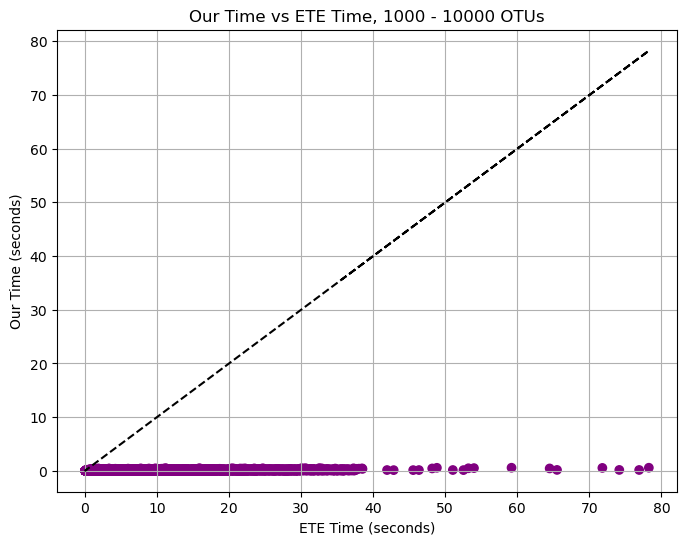

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Defining colors based on the condition
colors = ['purple' if our_time < ete_time else 'orange' for our_time, ete_time in zip(df['Our Time'], df['ETE Time'])]

# Plotting the points
plt.scatter(df["ETE Time"], df["Our Time"], c=colors)

# Adding the 1-to-1 line
plt.plot(df["ETE Time"], df["ETE Time"], color='black', linestyle='--')

# Labeling axes and title
plt.xlabel("ETE Time (seconds)")
plt.ylabel("Our Time (seconds)")
plt.title("Our Time vs ETE Time, 1000 - 10000 OTUs")

# Showing the plot
plt.grid(True)
plt.show()

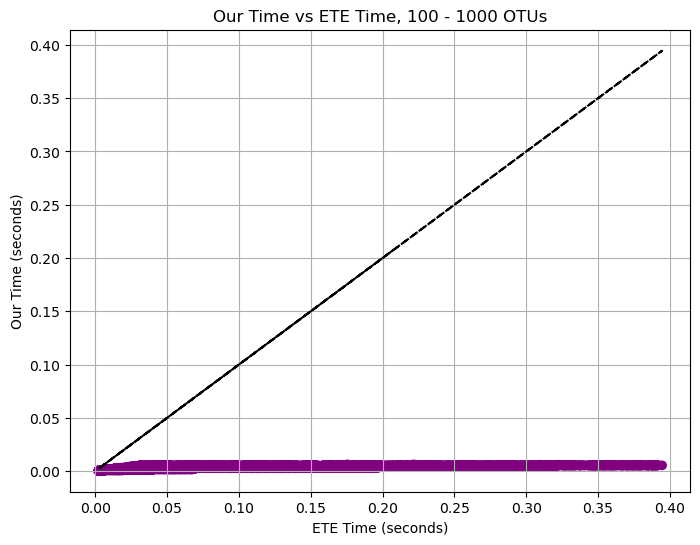

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Defining colors based on the condition
colors = ['purple' if our_time < ete_time else 'orange' for our_time, ete_time in zip(df['Our Time'], df['ETE Time'])]

# Plotting the points
plt.scatter(df_hun["ETE Time"], df_hun["Our Time"], c=colors)

# Adding the 1-to-1 line
plt.plot(df_hun["ETE Time"], df_hun["ETE Time"], color='black', linestyle='--')

# Labeling axes and title
plt.xlabel("ETE Time (seconds)")
plt.ylabel("Our Time (seconds)")
plt.title("Our Time vs ETE Time, 100 - 1000 OTUs")

# Showing the plot
plt.grid(True)
plt.show()

In [ ]:
sp_df = pd.read_csv("./results_2024/species_tests_2000.csv")
sp_df

,OTUs,Species,ID,Our Time,ETE Time,CTI
0,2000,1,0,0.006636,0.083915,1.235366
1,2000,2,0,0.006636,0.012480,1.358937
2,2000,5,0,0.006636,0.012289,1.278604
3,2000,10,0,0.006636,0.013081,1.267233
4,2000,20,0,0.006636,0.012825,1.286321
...,...,...,...,...,...,...
7495,2000,300,499,0.006677,0.013184,1.167136
7496,2000,400,499,0.006677,0.013125,1.179414
7497,2000,500,499,0.006677,0.012562,1.177237
7498,2000,1000,499,0.006677,0.012870,1.197508


Text(0.5, 0.98, '')

<Figure size 800x600 with 0 Axes>

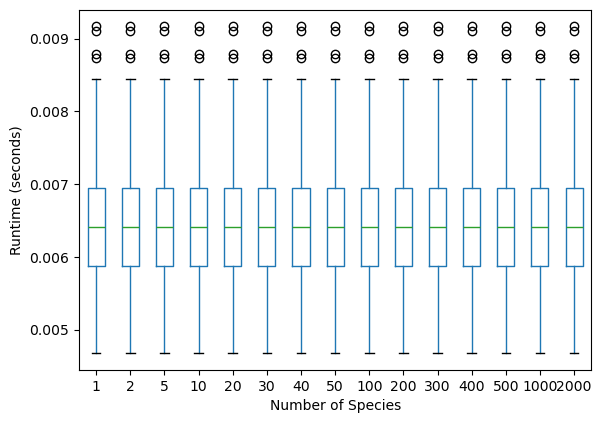

In [ ]:
df_mytime = sp_df[['Species', 'Our Time']].copy()

plt.figure(figsize=(8, 6))
df_mytime.boxplot(column='Our Time', by='Species', grid=False)
plt.xlabel('Number of Species')
plt.ylabel('Runtime (seconds)')
plt.title('')
plt.suptitle('')

Text(0.5, 1.0, '')

<Figure size 800x600 with 0 Axes>

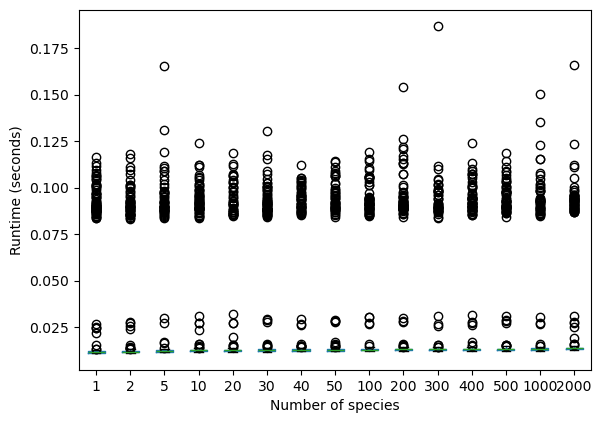

In [ ]:
df_mytime = sp_df[['Species', ' ETE Time']].copy()

plt.figure(figsize=(8, 6))
df_mytime.boxplot(column=' ETE Time', by='Species', grid=False)
plt.xlabel('Number of species')
plt.ylabel('Runtime (seconds)')
plt.suptitle('')
plt.title('')